In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 8
# rcParams['figure.dpi'] = 300


from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

In [2]:
import numba
from numba import jit

In [3]:
import sklearn


In [5]:
import sklearn
Y = sklearn.datasets.make_circles(n_samples=50, shuffle=False, noise=None, random_state=None, factor=0.3)[0]
# Y = Y[np.argsort(Y[:,0]),]
Y += np.random.normal(0,0.05, Y.shape)

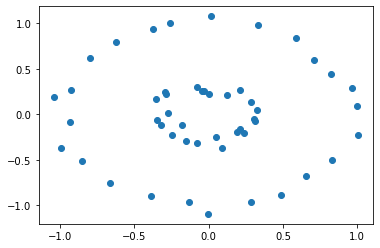

In [6]:
plt.scatter(Y[:,0],Y[:,1])

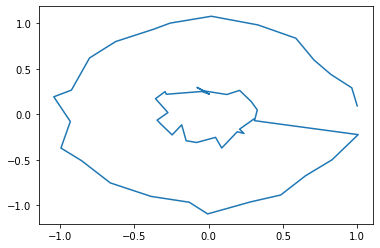

In [7]:
plt.plot(Y[:,0],Y[:,1])

In [8]:
import importlib
import gibbs_sampling as gs



In [9]:
importlib.reload(gs)

tree = gs.SpanningTree(Y)

In [10]:
_ = tree.runMCMC(100)
trace = tree.runMCMC(1000)

99
99
199
299
399
499
599
699
799
899
999


In [11]:
trace_A= [-x[0]@np.diag(1-x[6])@x[0].T for x in trace]

for i in range(len(trace)):
    np.fill_diagonal(trace_A[i],0)

In [12]:
trace_A[99].sum()

90.0

In [13]:
mean_mst = np.array(trace_A).mean(0)

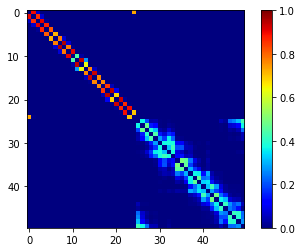

In [14]:
plt.imshow(mean_mst, vmin=0,vmax=1,cmap='jet')
plt.colorbar()

In [15]:
import igraph

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['figure.dpi'] = 300

In [17]:
c_vec = ['lightblue']*50
# c_vec[3] = 'red'
# c_vec[2] = 'yellow'
# c_vec[4] = 'purple'


In [18]:
trace_A[99].sum()

90.0

In [19]:
# a= trace_A[100]


# g = igraph.Graph.Adjacency((a > 0).tolist())
# g.to_undirected()

# layout = zip(list(-Y[:,0]), list(Y[:,1])) 
# out =  igraph.plot(g, layout = layout, vertex_color = c_vec)

# out.save('2moon_tree1.png')
# # out

In [20]:
# igraph.write(g, "2moon_tree1.graphml",format = "graphml")

In [21]:
# a= mean_mst


# g = igraph.Graph.Adjacency((a).tolist(),weighted=True)
# g.to_undirected()

# layout = zip(list(-Y[:,0]), list(Y[:,1])) 
# out =  igraph.plot(g, layout = layout, vertex_color = c_vec)

# # out.save('2moon_tree1.png')
# out

In [22]:
import networkx as nx

# g_nx = nx.Graph(g.get_edgelist())


In [27]:
Y= Y*100

In [24]:
Y[:,0]*= 0.8

In [28]:
g_nx= nx.Graph(mean_mst)
for i in range(Y.shape[0]):
    g_nx.nodes[i].update({"viz":{"position": {"x": Y[i,0], "y": Y[i,1], "z": 0},
                                'color': {'r': 192, 'g': 192, 'b': 192, 'a': 0},
                                 'size': "4"
                                }})

# nx.draw(g_nx)

nx.write_gexf(g_nx, "2rings_tree1.gexf")

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

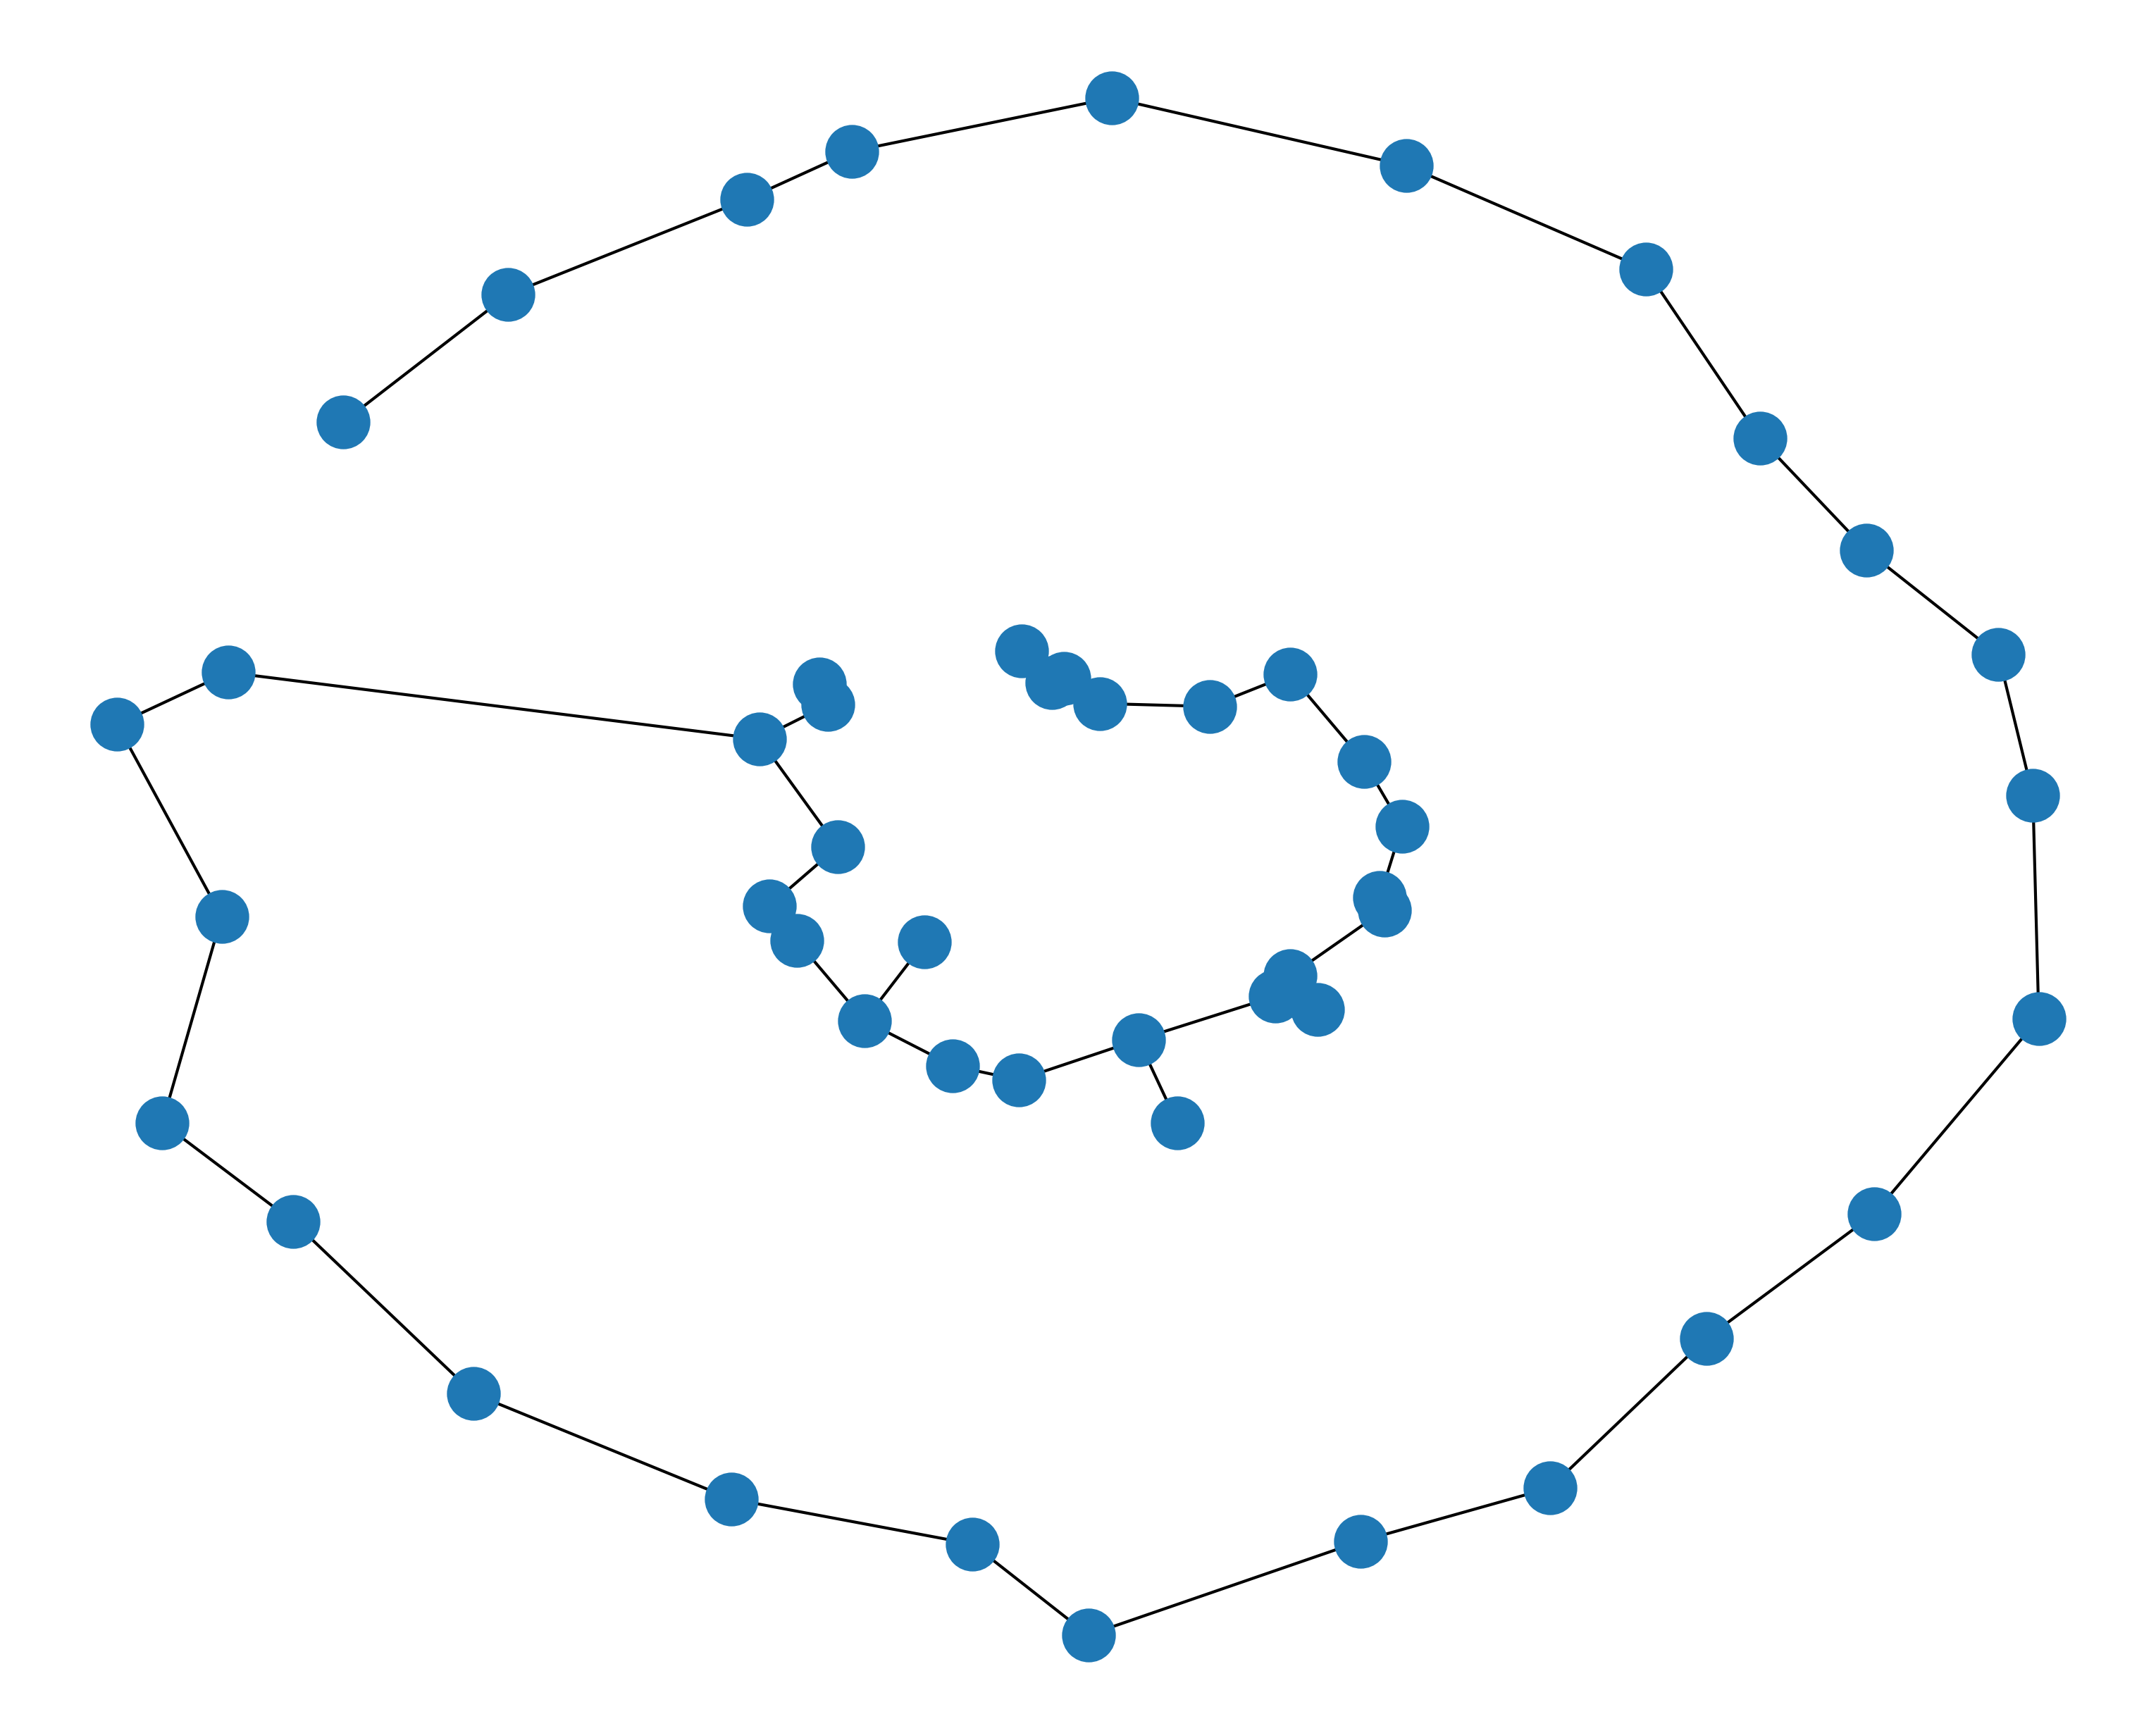

In [36]:
g_nx= nx.Graph(tree.mst0)
for i in range(Y.shape[0]):
    g_nx.nodes[i].update({"viz":{"position": {"x": Y[i,0], "y": Y[i,1], "z": 0},
                                'color': {'r': 192, 'g': 192, 'b': 192, 'a': 0},
                                 'size': "4"
                                }})

# nx.draw(g_nx)

nx.write_gexf(g_nx, "2rings_tree2.gexf")

nx.draw(g_nx, pos=Y)